### Transfer Bars

In [ ]:
import numpy as np

S33_data = 100*np.array([0.21607885578473812,
                    0.17692329457035338,
                    0.21979069405539994,
                    0.15775931584755112,
                    0.20026360712635224,
                    0.2023001961727452,
                    0.24543462166011187,
                    0.1864183383791227,
                    0.23035266295070217,
                    0.17353683897801545,
                    0.20491386790406396,
                    0.19530741589565118,
                    0.168,
                    0.22064482358600004,
                    0.19338341397164927])

S14_S33_data = 100*np.array([0.22718077129841838,
                        0.24642137999981134,
                        0.23466575182261457,
                        0.2295916683171585,
                        0.23019881353214686,
                        0.2600249695837931,
                        0.22249337445415873,
                        0.2495755878108819,
                        0.21694713238830884,
                        0.251,
                        0.24814260721123466])

bar_data = np.array([np.mean(S33_data), np.mean(S14_S33_data)])
bar_err = np.array([np.std(S33_data), np.std(S14_S33_data)])

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar([0, 1], bar_data, yerr=bar_err, color=['#1f77b4', '#ff7f0e'])
plt.xticks([0, 1], ['S33', 'S14->S33'])
plt.xlim([-0.75, 1.75])
plt.ylabel('Decoding Accuracy (%)')
plt.show()

In [ ]:
from scipy.stats import ttest_ind

t, p = ttest_ind(S33_data, S14_S33_data)
print(p < 0.05)

### Single Patient Boxplot

In [30]:
import csv
import numpy as np

def open_acc_csv(filename):
    with open(filename, 'r', newline='') as f:
        reader = csv.reader(f)
        data = np.array(list(reader))

    acc_data = 100*np.array(data[:, 0], dtype=np.float32)
    return acc_data

S14_data = open_acc_csv('acc_data/S14_acc.csv')

S26_data = open_acc_csv('acc_data/S26_acc.csv')

S23_data = open_acc_csv('acc_data/S23_acc.csv')

S33_data = open_acc_csv('acc_data/S33_acc.csv')

bar_data = np.array([np.mean(S14_data), np.mean(S26_data), np.mean(S23_data), np.mean(S33_data)])
bar_err = np.array([np.std(S14_data), np.std(S26_data), np.std(S23_data), np.std(S33_data)])

In [31]:
print(bar_data)

[46.879322 45.149624 24.594973 27.551851]


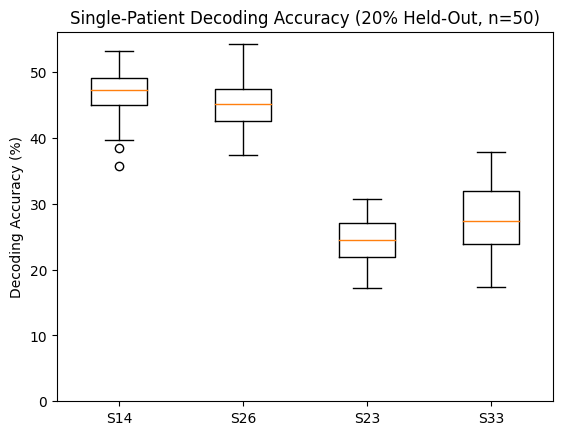

In [32]:
import matplotlib.pyplot as plt

plt.figure()
# plt.bar(range(len(bar_data)), bar_data, yerr=bar_err, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.boxplot([S14_data, S26_data, S23_data, S33_data])
plt.xticks(range(1, len(bar_data)+1), ['S14', 'S26', 'S23', 'S33'])
# plt.xlim([-0.75, len(bar_data) - 0.25])
plt.ylabel('Decoding Accuracy (%)')
plt.ylim(bottom=0)
plt.title('Single-Patient Decoding Accuracy (20% Held-Out, n=50)')
plt.show()

### Transfer Heatmap

In [33]:
import matplotlib.pyplot as plt
import numpy as np

#### Testing heatmap

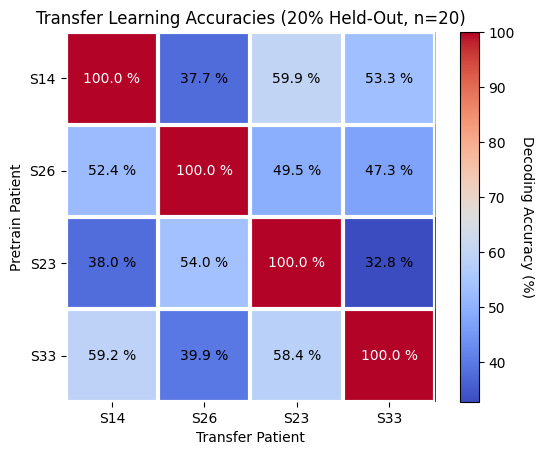

In [28]:
from visualization.transfer_results_vis import (combine_transfer_single,
                                                heatmap,
                                                annotate_heatmap) 

transfer_data = 100*np.random.rand(4, 4, 20)
single_data = 100*np.ones((4, 50))
pt_labels = ['S14', 'S26', 'S23', 'S33']

heatmap_data = combine_transfer_single(transfer_data, single_data)
im, cbar = heatmap(heatmap_data, pt_labels, pt_labels,
                   cmap='coolwarm',
                   cbarlabel="Decoding Accuracy (%)")
texts = annotate_heatmap(im, valfmt="{x:.1f} %")
ax = plt.gca()
ax.set_ylabel('Pretrain Patient')
ax.set_xlabel('Transfer Patient')
ax.set_title('Transfer Learning Accuracies (20% Held-Out, n=20)')
plt.show()



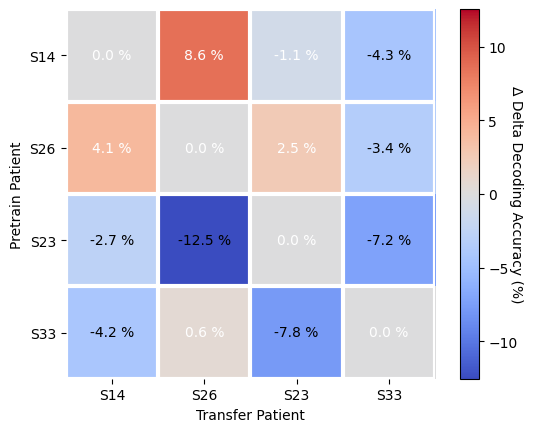

In [23]:
from visualization.transfer_results_vis import transform_col_by_diag

transfer_data = 100*np.random.rand(4, 4, 20)
single_data = 100*np.random.rand(4, 50)
pt_labels = ['S14', 'S26', 'S23', 'S33']

heatmap_data = combine_transfer_single(transfer_data, single_data)
delta_heatmap_data = transform_col_by_diag(heatmap_data)

im, cbar = heatmap(delta_heatmap_data, pt_labels, pt_labels,
                   cmap='coolwarm',
                   cbarlabel=u"\u0394 Delta Decoding Accuracy (%)")
texts = annotate_heatmap(im, valfmt="{x:.1f} %")
ax = plt.gca()
ax.set_ylabel('Pretrain Patient')
ax.set_xlabel('Transfer Patient')
im.set_clim(-max(abs(i) for i in im.get_clim()), max(abs(i) for i in im.get_clim()))
plt.show()

#### Heatmap Real Data

##### Old Data

In [36]:
S14_S33_tr = 100*np.array([
                0.22592592592592592,
                0.26296296296296295,
                0.30370370370370364,
                0.47962962962962963,
                0.2351851851851852,
                0.2759259259259259,
                0.42777777777777776,
                0.36851851851851847,
                0.30925925925925923,
                0.27222222222222225,
                0.2074074074074074,
                0.42407407407407405,
                0.34074074074074073,
                0.40555555555555556,
                0.22962962962962966,
                0.2222222222222222,
                0.2537037037037037,
                0.29074074074074074,
                0.27037037037037037,
                0.19259259259259257])

S14_S23_tr = 100*np.array([
                0.17499999999999996,
                0.15476190476190477,
                0.2193121693121693,
                0.22857142857142854,
                0.16904761904761906,
                0.1554232804232804,
                0.27235449735449735,
                0.2595238095238095,
                0.29259259259259257,
                0.20925925925925926,
                0.1783068783068783,
                0.24841269841269842,
                0.205026455026455,
                0.19867724867724867,
                0.27328042328042323,
                0.2123015873015873,
                0.176984126984127,
                0.2404761904761905,
                0.20264550264550266,
                0.15767195767195769])

S14_S26_tr = 100*np.array([
                0.4432573599240266,
                0.31436372269705604,
                0.24952516619183285,
                0.3857312440645774,
                0.32072649572649575,
                0.3138176638176638,
                0.47948717948717945,
                0.48801044634377966,
                0.36433998100664766,
                0.4135327635327635,
                0.40180436847103507,
                0.3642450142450142,
                0.3273029439696106,
                0.3481006647673314,
                0.4319563152896487,
                0.4565289648622982,
                0.40033238366571705,
                0.5148860398860399,
                0.413034188034188,
                0.4396723646723647])

S26_S33_tr = 100*np.array([
                0.22962962962962966,
                0.3722222222222222,
                0.29444444444444445,
                0.4296296296296296,
                0.24814814814814815,
                0.3259259259259259,
                0.25185185185185177,
                .3592592592592593,
                0.31851851851851853,
                0.31666666666666665,
                0.32592592592592595,
                0.42777777777777776,
                0.22407407407407406,
                0.26666666666666666,
                0.2759259259259259,
                0.29444444444444445,
                0.2111111111111111,
                0.40185185185185185,
                0.3351851851851852,
                0.3277777777777777])

S26_S23_tr = 100*np.array([
                0.31494708994709,
                0.19973544973544974,
                0.25410052910052916,
                0.16865079365079363,
                0.25357142857142856,
                0.21521164021164024,
                0.25436507936507935,
                0.2150793650793651,
                0.1705026455026455,
                0.2523809523809524,
                0.19285714285714287,
                0.2768518518518518,
                0.24431216931216929,
                0.25595238095238093,
                0.1415343915343915,
                0.23822751322751323,
                0.2171957671957672,
                0.19272486772486774,
                0.2718253968253968,
                0.2029100529100529])

S26_S14_tr = 100*np.array([
                0.4805148555148555,
                0.34101546601546606,
                0.5459401709401709,
                0.49936406186406185,
                0.40555046805046807,
                0.4629375254375254,
                0.43747456247456246,
                0.4477767602767602,
                0.49689662189662187,
                0.43671143671143675,
                0.495014245014245,
                0.4451821326821327,
                0.40572853072853077,
                0.4338878713878714,
                0.42600223850223856,
                0.4276048026048026,
                0.4277065527065527,
                0.3595848595848596,
                0.43571937321937326,
                0.4561457061457062])

S23_S33_tr = 100*np.array([
                0.17037037037037037,
                0.3296296296296296,
                0.4222222222222222,
                0.27037037037037037,
                0.24259259259259258,
                0.1537037037037037,
                0.22037037037037036,
                0.27037037037037037,
                0.412962962962963,
                0.3537037037037037,
                0.2740740740740741,
                0.2796296296296296,
                0.3111111111111111,
                0.22037037037037038,
                0.17407407407407408,
                0.2425925925925926,
                0.22037037037037038,
                0.2518518518518518,
                0.25,
                0.22407407407407406])

S23_S26_tr = 100*np.array([
                0.4106600189933523,
                0.3494301994301995,
                0.48760683760683754,
                0.40911680911680903,
                0.43905508072174737,
                0.3938746438746439,
                0.4884377967711301,
                0.4291785375118709,
                0.3662155745489079,
                0.48216999050332376,
                0.42958214624881297,
                0.4925451092117759,
                0.298931623931624,
                0.3983143399810067,
                0.4326685660018993,
                0.4253561253561253,
                0.37896486229819565,
                0.3569325735992403,
                0.4322649572649573,
                0.3520180436847104])

S23_S14_tr = 100*np.array([
                0.39713064713064716,
                0.31351750101750103,
                0.42562067562067557,
                0.4765466015466015,
                0.45670533170533173,
                0.42055860805860806,
                0.41381766381766383,
                0.3598137973137973,
                0.5039428164428165,
                0.4646927146927147,
                0.42831705331705333,
                0.45868945868945865,
                0.44976088726088725,
                0.41966829466829464,
                0.48972323972323967,
                0.4481583231583231,
                0.44721713471713465,
                0.41659035409035405,
                0.38438644688644685,
                0.3922212047212047])

S33_S23_tr = 100*np.array([
                0.3015873015873016,
                0.2818783068783069,
                0.2779100529100529,
                0.30119047619047623,
                0.26785714285714285,
                0.24616402116402114,
                0.3058201058201058,
                0.2578042328042328,
                0.2883597883597883,
                0.31719576719576714,
                0.18015873015873016,
                0.2757936507936508,
                0.2472222222222223,
                0.2417989417989418,
                0.275,
                0.19814814814814816,
                0.280026455026455,
                0.24259259259259258,
                0.12380952380952381,
                0.15])

S33_S26_tr = 100*np.array([
                0.33853276353276357,
                0.3599240265906933,
                0.3787511870845204,
                0.3247388414055081,
                0.42044159544159543,
                0.30325261158594485,
                0.39862298195631524,
                0.4101377018043684,
                0.3602326685660019,
                0.25085470085470085,
                0.46557454890788225,
                0.43637226970560306,
                0.4176400759734093,
                0.44306742640075975,
                0.4171415004748338,
                0.4525403608736942,
                0.3965574548907882,
                0.3443969610636277,
                0.4313390313390313,
                0.3791785375118708])

S33_S14_tr = 100*np.array([
                0.44286731786731787,
                0.43460012210012205,
                0.3867012617012617,
                0.41404660154660156,
                0.43200549450549447,
                0.34597578347578345,
                0.448056573056573,
                0.3496133496133496,
                0.38471713471713476,
                0.3318070818070818,
                0.3856583231583232,
                0.425010175010175,
                0.47583435083435077,
                0.46827940577940574,
                0.4772079772079772,
                0.46662596662596667,
                0.48939255189255193,
                0.4790140415140416,
                0.4488196988196989,
                0.3773402523402523])

##### New Data

In [34]:
S14_S33_tr = open_acc_csv('acc_data/transfer_S14-S33_acc.csv')
S14_S23_tr = open_acc_csv('acc_data/transfer_S14-S23_acc.csv')
S14_S26_tr = open_acc_csv('acc_data/transfer_S14-S26_acc.csv')

S26_S33_tr = open_acc_csv('acc_data/transfer_S26-S33_acc.csv')
S26_S23_tr = open_acc_csv('acc_data/transfer_S26-S23_acc.csv')
S26_S14_tr = open_acc_csv('acc_data/transfer_S26-S14_acc.csv')

S23_S33_tr = open_acc_csv('acc_data/transfer_S23-S33_acc.csv')
S23_S26_tr = open_acc_csv('acc_data/transfer_S23-S26_acc.csv')
S23_S14_tr = open_acc_csv('acc_data/transfer_S23-S14_acc.csv')

S33_S23_tr = open_acc_csv('acc_data/transfer_S33-S23_acc.csv')
S33_S26_tr = open_acc_csv('acc_data/transfer_S33-S26_acc.csv')
S33_S14_tr = open_acc_csv('acc_data/transfer_S33-S14_acc.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'acc_data/transfer_S14_S33_acc.csv'

In [37]:
transfer_data = np.zeros((4, 4, S14_S33_tr.shape[0]))
transfer_data[0, 1, :] = S14_S26_tr
transfer_data[0, 2, :] = S14_S23_tr
transfer_data[0, 3, :] = S14_S33_tr
transfer_data[1, 0, :] = S26_S14_tr
transfer_data[1, 2, :] = S26_S23_tr
transfer_data[1, 3, :] = S26_S33_tr
transfer_data[2, 0, :] = S23_S14_tr
transfer_data[2, 1, :] = S23_S26_tr
transfer_data[2, 3, :] = S23_S33_tr
transfer_data[3, 0, :] = S33_S14_tr
transfer_data[3, 1, :] = S33_S26_tr
transfer_data[3, 2, :] = S33_S23_tr
print(transfer_data[:,:,0])

single_data = np.zeros((4, S14_data.shape[0]))
single_data[0, :] = S14_data
single_data[1, :] = S26_data
single_data[2, :] = S23_data
single_data[3, :] = S33_data
print(single_data[:,0])

[[ 0.         44.32573599 17.5        22.59259259]
 [48.05148555  0.         31.49470899 22.96296296]
 [39.71306471 41.0660019   0.         17.03703704]
 [44.28673179 33.85327635 30.15873016  0.        ]]
[40.69240944 45.91168091 22.20899471 12.77777778]


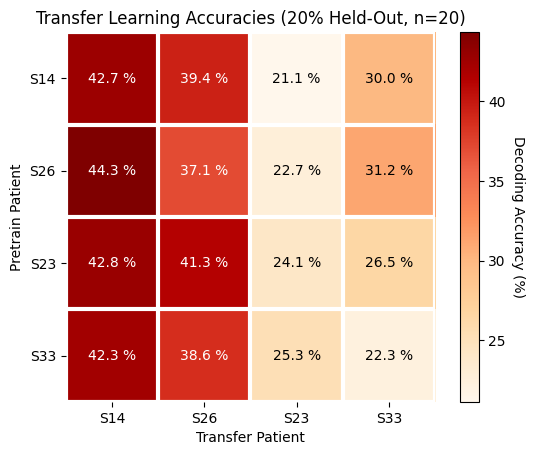

In [51]:
from visualization.transfer_results_vis import (combine_transfer_single,
                                                heatmap,
                                                annotate_heatmap) 

pt_labels = ['S14', 'S26', 'S23', 'S33']

heatmap_data = combine_transfer_single(transfer_data, single_data)
im, cbar = heatmap(heatmap_data, pt_labels, pt_labels,
                   cmap='OrRd',
                   cbarlabel="Decoding Accuracy (%)")
texts = annotate_heatmap(im, valfmt="{x:.1f} %")
ax = plt.gca()
ax.set_ylabel('Pretrain Patient')
ax.set_xlabel('Transfer Patient')
ax.set_title('Transfer Learning Accuracies (20% Held-Out, n=20)')
# im.set_clim(0, im.get_clim()[1])
plt.show()

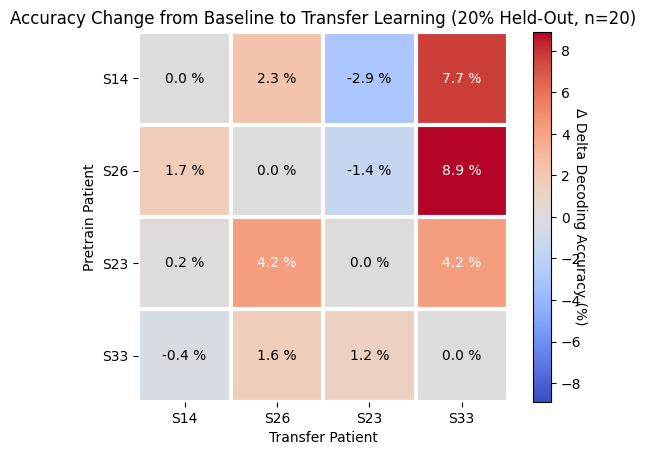

In [40]:
from visualization.transfer_results_vis import transform_col_by_diag

delta_heatmap_data = transform_col_by_diag(heatmap_data)

im, cbar = heatmap(delta_heatmap_data, pt_labels, pt_labels,
                   cmap='coolwarm',
                   cbarlabel=u"\u0394 Delta Decoding Accuracy (%)")
texts = annotate_heatmap(im, valfmt="{x:.1f} %")
ax = plt.gca()
ax.set_ylabel('Pretrain Patient')
ax.set_xlabel('Transfer Patient')
ax.set_title('Accuracy Change from Baseline to Transfer Learning (20% Held-Out, n=20)')
im.set_clim(-max(abs(i) for i in im.get_clim()), max(abs(i) for i in im.get_clim()))
plt.show()

Significance Testing

In [77]:
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

p_vals = np.zeros((4, 4))
for i in range(p_vals.shape[0]):  # pretrain pt
    for j in range(p_vals.shape[1]):  # transfer pt - comparing this to single results
        if i == j:
            p_vals[i, j] = 1
        else:
            p_vals[i, j] = ttest_ind(transfer_data[i, j, :], single_data[j, :])[1]

corr_p_vals = multipletests(p_vals.flatten(), method='fdr_bh')[1].reshape(p_vals.shape)
print(corr_p_vals < 0.05)
print(corr_p_vals < 0.01)
print(corr_p_vals < 0.001)


[[False False  True  True]
 [False False False  True]
 [False  True False False]
 [False False False False]]
[[False False False  True]
 [False False False  True]
 [False False False False]
 [False False False False]]
[[False False False False]
 [False False False  True]
 [False False False False]
 [False False False False]]
